In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

### Data Processing

##### Load in Review data 

In [2]:
review = []
for line in open('review.json', 'r'):
    review.append(json.loads(line))

In [3]:
business = []
for line in open('business.json', 'r'):
    business.append(json.loads(line))

In [4]:
user_df = pd.read_csv('user.csv',names=['user id','# of funny votes','# of useful votes',' # of cool votes',' avg rating',' total review count'])
business_df = pd.read_csv('business.csv',header = None)

In [5]:
review[0]

{'votes': {'funny': 0, 'useful': 5, 'cool': 2},
 'user_id': 'rLtl8ZkDX5vH5nAx9C3q5Q',
 'review_id': 'fWKvX83p0-ka4JS3dc6E5A',
 'stars': 5,
 'date': '2011-01-26',
 'text': 'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It wa

In [6]:
user = []
for i in review:
    user.append([i['user_id'],i['business_id'],i['stars']])

In [7]:
user[0]

['rLtl8ZkDX5vH5nAx9C3q5Q', '9yKzy9PApeiPPOUJEtnvkg', 5]

In [8]:
business[0]

{'business_id': 'PzOqRohWw7F7YEPBz6AubA',
 'full_address': '6520 W Happy Valley Rd\nSte 101\nGlendale Az, AZ 85310',
 'open': True,
 'categories': ['Food', 'Bagels', 'Delis', 'Restaurants'],
 'city': 'Glendale Az',
 'review_count': 14,
 'name': 'Hot Bagels & Deli',
 'neighborhoods': [],
 'longitude': -112.200264,
 'state': 'AZ',
 'stars': 3.5,
 'latitude': 33.712797,
 'type': 'business'}

In [9]:
def get_business_id(search_business_token):        
    df = pd.read_csv('business-lookup.csv',header = None)
    return df[df[1]==search_business_token][0].item()

In [10]:
get_business_id('FuykdWajbSDj0hBY5DIuZQ')

3998

In [11]:
def get_user_id(search_user_token):
    df = pd.read_csv('user-lookup.csv',header=None)
    return df[df[1]==search_user_token][0].item()

In [12]:
get_user_id('rLtl8ZkDX5vH5nAx9C3q5Q')

10000

In [13]:
user_df.head()

,user id,# of funny votes,# of useful votes,# of cool votes,avg rating,total review count
0,14443,30,45,36,3.79,19
1,17782,5,24,9,3.90,10
2,13295,2,24,0,4.23,22
3,15187,0,7,0,4.00,9
4,16016,13,21,5,3.62,16


In [14]:
business_df[0][:1000].head()

0    4584
1    4222
2    4646
3    4137
4    1100
Name: 0, dtype: int64

### Extract userid and businessid and other features to a list,array or pandas

In [15]:
userid = []
for i in user[:10000]:
    userid.append([get_user_id(i[0]),get_business_id(i[1]),i[2]])

In [16]:
userid = np.asarray(userid)
userid

array([[10000,     0,     5],
       [10001,     1,     5],
       [10002,     2,     5],
       ...,
       [11324,  1848,     5],
       [13447,   140,     4],
       [10548,   961,     5]])

### Asign each column an unique number in the range of row length 

In [ ]:
user_df = pd.DataFrame(userid,columns = ['userId','itemId','Rating'])
user_df['userId'] = user_df['userId'].astype('category').cat.codes.values
user_df['itemId'] = user_df['itemId'].astype('category').cat.codes.values

In [18]:
user_df.head()

,userId,itemId,Rating
0,0,0,5
1,1,1,5
2,2,2,5
3,3,3,4
4,4,4,5


In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(user_df, test_size=0.2)

In [20]:
train.head()

,userId,itemId,Rating
6231,204,1828,3
1456,1143,1053,4
4045,780,386,4
4681,2776,2293,1
1125,916,855,3


import csv


with open('people1.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(row)

csvFile.close()

In [21]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
from keras.layers import merge
from keras.layers import Input, Embedding, Dot, Reshape, Dense
n_users, n_movies = len(userid[:,0]), len(userid[:,1])
n_latent_factors = 3

Using TensorFlow backend.


In [22]:
movie_input = keras.layers.Input(shape=[1],name='Business')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='Bussiness-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenBusiness')(movie_embedding)

user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input))

#prod = keras.layers.Merge([movie_vec, user_vec], mode='dot',name='DotProduct')
prod = Dot(name = 'dot_product', normalize = True, axes = 1)([movie_vec, user_vec])
model = keras.Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Business (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Bussiness-Embedding (Embedding) (None, 1, 3)         30003       Business[0][0]                   
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 3)         30003       User[0][0]                       
__________________________________________________________________________________________________
FlattenBus

In [24]:
history = model.fit([train['userId'], train['itemId']], train['Rating'], epochs=100, verbose=0)

Instructions for updating:
Use tf.cast instead.


Text(0, 0.5, 'Train Error')

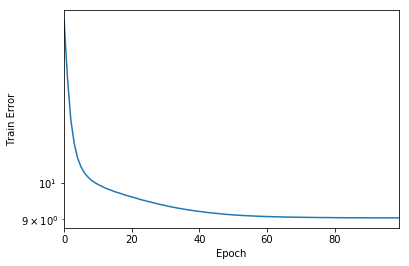

In [25]:
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

In [26]:
y_hat = np.round(model.predict([test['userId'], test['itemId']]),0)
y_true = test['Rating']

In [27]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_hat)

3.2765

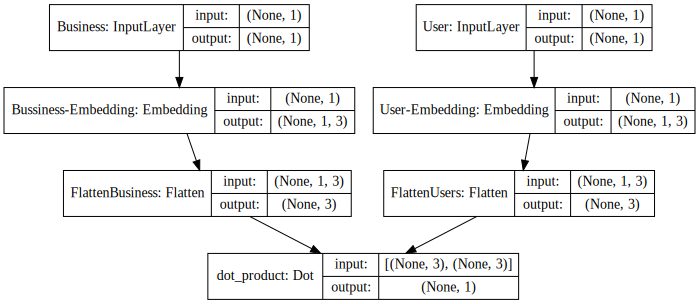

In [29]:
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

## Extract Embeddings and Analyze

In [ ]:
# Extract embeddings
user_layer = model.get_layer('User-Embedding')
user_weights = book_layer.get_weights()[0]
user_weights.shape

#### We need to normalize the embeddings so that the dot product between two embeddings becomes the cosine similarity.

In [ ]:

user_weights = user_weights / np.linalg.norm(user_weights, axis = 1).reshape((-1, 1))
user_weights[0][:10]
np.sum(np.square(user_weights[0]))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 15

def find_similar(name, weights, index_name = 'user', n = 10, least = False, return_dist = False, plot = False):
    """Find n most similar items (or least) to name based on embeddings. Option to also plot the results"""
    
    # Select index and reverse index
    if index_name == 'userid':
        index = book_index
        rindex = index_book
    elif index_name == 'businessid':
        index = link_index
        rindex = index_link
    
    # Check to make sure `name` is in index
    try:
        # Calculate dot product between book and all others
        dists = np.dot(weights, weights[index[name]])
    except KeyError:
        print(f'{name} Not Found.')
        return
    
    # Sort distance indexes from smallest to largest
    sorted_dists = np.argsort(dists)
    
    # Plot results if specified
    if plot:
        
        # Find furthest and closest items
        furthest = sorted_dists[:(n // 2)]
        closest = sorted_dists[-n-1: len(dists) - 1]
        items = [rindex[c] for c in furthest]
        items.extend(rindex[c] for c in closest)
        
        # Find furthest and closets distances
        distances = [dists[c] for c in furthest]
        distances.extend(dists[c] for c in closest)
        
        colors = ['r' for _ in range(n //2)]
        colors.extend('g' for _ in range(n))
        
        data = pd.DataFrame({'distance': distances}, index = items)
        
        # Horizontal bar chart
        data['distance'].plot.barh(color = colors, figsize = (10, 8),
                                   edgecolor = 'k', linewidth = 2)
        plt.xlabel('Cosine Similarity');
        plt.axvline(x = 0, color = 'k');
        
        # Formatting for italicized title
        name_str = f'{index_name.capitalize()}s Most and Least Similar to'
        for word in name.split():
            # Title uses latex for italize
            name_str += ' $\it{' + word + '}$'
        plt.title(name_str, x = 0.2, size = 28, y = 1.05)
        
        return None
    
    # If specified, find the least similar
    if least:
        # Take the first n from sorted distances
        closest = sorted_dists[:n]
         
        print(f'{index_name.capitalize()}s furthest from {name}.\n')
        
    # Otherwise find the most similar
    else:
        # Take the last n sorted distances
        closest = sorted_dists[-n:]
        
        # Need distances later on
        if return_dist:
            return dists, closest
        
        
        print(f'{index_name.capitalize()}s closest to {name}.\n')
        
    # Need distances later on
    if return_dist:
        return dists, closest
    
    
    # Print formatting
    max_width = max([len(rindex[c]) for c in closest])
    
    # Print the most similar and distances
    for c in reversed(closest):
        print(f'{index_name.capitalize()}: {rindex[c]:{max_width + 2}} Similarity: {dists[c]:.{2}}')